<a href="https://colab.research.google.com/github/ck1972/Python-Geospatial_Model1/blob/main/5a_Downloading_Kaggle_Datasets1_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Kaggle Datasets

## Overview
This tutorial provides a step-by-step guide to downloading and organizing datasets from Kaggle for use in deep learning workflows.

### Learning objectives
By the end of this tutorial, participants will be able to:
- Understand how to generate and securely manage the Kaggle API key for dataset downloads.
- Configure the Google Colab environment to authenticate with the Kaggle API.
- Use the Kaggle API to download datasets and move them to a desired location in Google Drive.
- Create and manage a directory structure that separates datasets into training and testing subsets with images and masks.
- Write and execute a Python function to split datasets into training (80%) and testing (20%) subsets.
- Verify the directory structure to ensure proper organization for machine learning workflows.


## Step 1: Obtain Your API Key
- Log in to the [Kaggle's platform](https://www.kaggle.com/).
- Click your name and click 'Settings'.
- Navigate to 'API' and click 'Create New Token'. This generate a key if one does not already exist. It’s often provided as a JSON file or a single string.
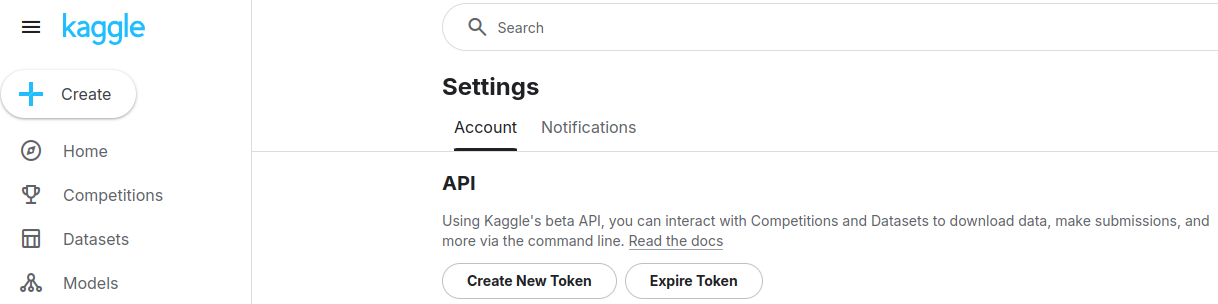

## Step 2. Secure Your API Key
- Do not share publicly. Keep the API key private to avoid misuse or security breaches.
- Save it in a secure location on your computer or cloud storage (e.g., in your Google Drive for Google Colab usage).

## Step 3: Set Up in Your Environment
### Install kagglehub library
Let' start by installing the kagglehub library.

In [ ]:
# Install kagglehub library
!pip install kagglehub

### Mount Google Drive
Next, mount Google Drive to access and save the data.

In [ ]:
# Mount Google Drive to access
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Set the working directory
Set the working directory, which contains the folder containing 'kaggle.json' (your Kaggle API key).

In [ ]:
# Set the working directory
import os
os.chdir('/content/drive/MyDrive/Kaggle_key')

### Copy to the correction location
We want to ensure that Kaggle’s credential file (kaggle.json) is placed in the correct directory so that the Kaggle API can authenticate properly.

In [ ]:
# Ensure kaggle.json is copied to the correct location for authentication
import shutil

# Create the '.kaggle' directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Copy kaggle.json from Google Drive to Colab's root directory
shutil.copy('kaggle.json', '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

### Download dataset
Next, import Install kagglehub and download dataset.

In [ ]:
# =========================================
# Import kagglehub and download dataset
import kagglehub

# Define path for storing dataset
drive_path = '/content/drive/MyDrive/Flood_data1'

# Download via kagglehub
path = kagglehub.dataset_download("faizalkarim/flood-area-segmentation")
print("Path to dataset files:", path)

# Move the dataset to your desired Drive location
shutil.move(path, drive_path)
print(f"Dataset moved to: {drive_path}")

# Quick check: List what’s inside your Flood_data1 directory
!ls -R "{drive_path}"

# =========================================
# You now see that the dataset has "Image", "Mask", etc.
# There's NO 'flood-area-segmentation/train' or 'flood-area-segmentation/test'
# So we will split from the single "Image"/"Mask" folders.
# =========================================

### Train and test directories
Next, we want to create the necessary directory structure for organizing training and testing datasets.

In [ ]:
# =========================================
# Create train and test directories
# =========================================
train_dir = os.path.join(drive_path, 'train')
test_dir = os.path.join(drive_path, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_image_dir = os.path.join(train_dir, 'Image')
train_mask_dir  = os.path.join(train_dir, 'Mask')
test_image_dir  = os.path.join(test_dir, 'Image')
test_mask_dir   = os.path.join(test_dir, 'Mask')

os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_mask_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_mask_dir, exist_ok=True)

### Define split_data function
Define split_data function with 80% for training and 20% for testing. The split_data function is designed to divide a dataset of images and their corresponding masks into training and testing subsets based on a specified ratio (defaulting to 80% training and 20% testing).

In [ ]:
# =========================================
# Define split_data function
# =========================================
import random

def split_data(src_image_dir, src_mask_dir, dest_image_dir, dest_mask_dir, test_image_dir, test_mask_dir, split_ratio=0.8):
    # Gather files
    image_files = [f for f in os.listdir(src_image_dir) if os.path.isfile(os.path.join(src_image_dir, f))]
    mask_files  = [f for f in os.listdir(src_mask_dir)  if os.path.isfile(os.path.join(src_mask_dir, f))]

    # Sort and shuffle
    image_files = sorted(image_files)
    mask_files  = sorted(mask_files)
    random.shuffle(image_files)
    random.shuffle(mask_files)

    # Determine where to split
    split_index = int(len(image_files) * split_ratio)

    # Copy training portion
    for i in range(split_index):
        shutil.copy(os.path.join(src_image_dir,  image_files[i]), os.path.join(dest_image_dir,  image_files[i]))
        shutil.copy(os.path.join(src_mask_dir,   mask_files[i]),  os.path.join(dest_mask_dir,   mask_files[i]))

    # Copy testing portion
    for i in range(split_index, len(image_files)):
        shutil.copy(os.path.join(src_image_dir,  image_files[i]), os.path.join(test_image_dir,  image_files[i]))
        shutil.copy(os.path.join(src_mask_dir,   mask_files[i]),  os.path.join(test_mask_dir,   mask_files[i]))

### Split train and test data
Next, perform the actual train/test split by calling the previously defined split_data function.

In [ ]:
# =========================================
# Perform train/test split
# =========================================
# Use your actual "Image" and "Mask" folders that exist in Flood_data1
dataset_image_path = os.path.join(drive_path, 'Image')
dataset_mask_path  = os.path.join(drive_path, 'Mask')

split_data(
    src_image_dir=dataset_image_path,
    src_mask_dir=dataset_mask_path,
    dest_image_dir=train_image_dir,
    dest_mask_dir=train_mask_dir,
    test_image_dir=test_image_dir,
    test_mask_dir=test_mask_dir,
    split_ratio=0.8
)

### Verify structure
Finally, verify the directory structure after performing the train/test split.

In [ ]:
# =========================================
# Verify structure
# =========================================
for root, dirs, files in os.walk(drive_path):
    print(f"\nROOT: {root}\n  Subfolders: {dirs}\n  Files: {files}")

print("Data split completed!")